In [45]:
import sys
sys.path.append("/home/huaqingj/MyResearch/TVDN")

In [46]:
from pyTVDN import TVDNDetect, TVDNRankTuning
from pathlib import Path
from scipy.io import loadmat
from scipy.signal import detrend
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import pickle
%matplotlib inline
plt.style.use('ggplot')

In [47]:
from scipy.signal import lfilter, firls, decimate

In [48]:
saveDir = Path("./fMRIHPFs")

In [49]:
fils = list(saveDir.glob("*.pkl"))

In [50]:
fils = sorted(fils, key=lambda x: int(x.stem.split("_")[-1]))

In [51]:
filsNcpts20 = []
for fil in fils:
    with open(fil, "rb") as f:
        res = pickle.load(f)
    if len(res.DetectObj.ecpts) == 20:
        filsNcpts20.append(fil)

### Original results

In [58]:
with open(filsNcpts20[0], "rb") as f:
    res = pickle.load(f)

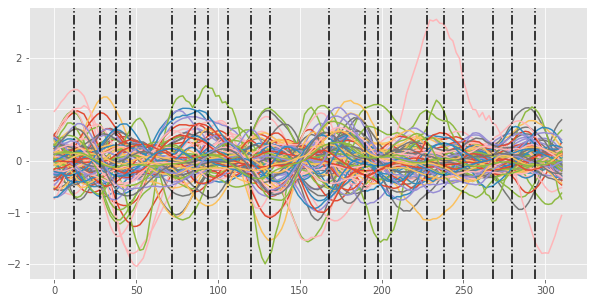

In [59]:
res.DetectObj.PlotEcpts()

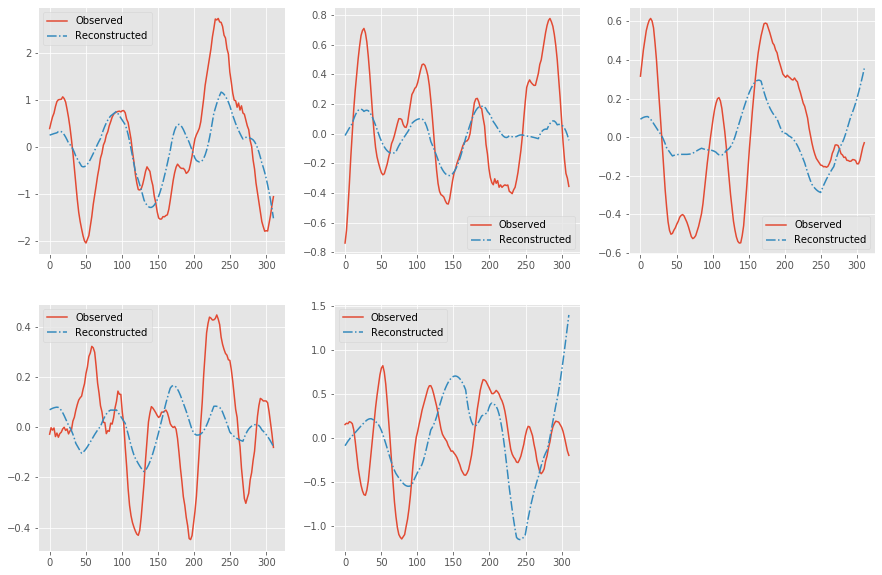

array([27, 34, 39, 46, 61])

In [60]:
res.DetectObj.PlotRecCurve()

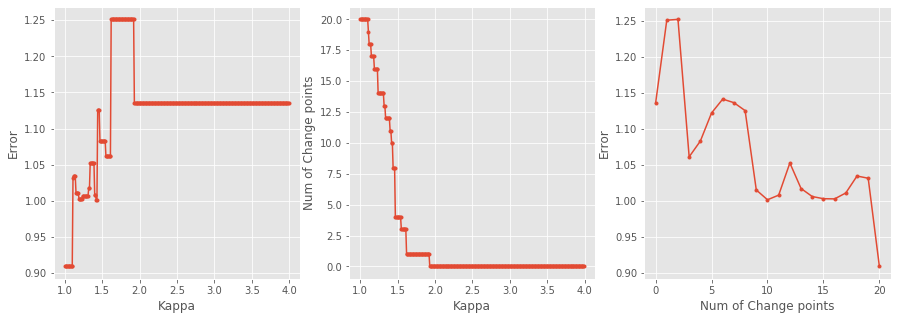

In [54]:
res.DetectObj.PlotKappaErrCurve()

In [55]:
res.DetectObj.UpdateEcpts(10)

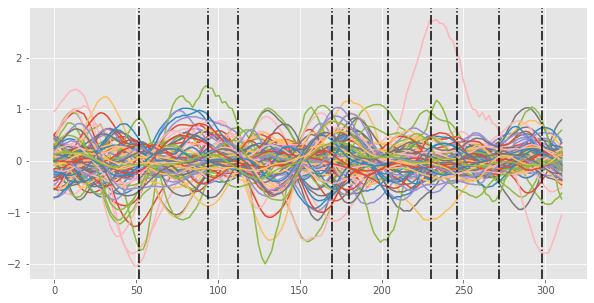

In [56]:
res.DetectObj.PlotEcpts()

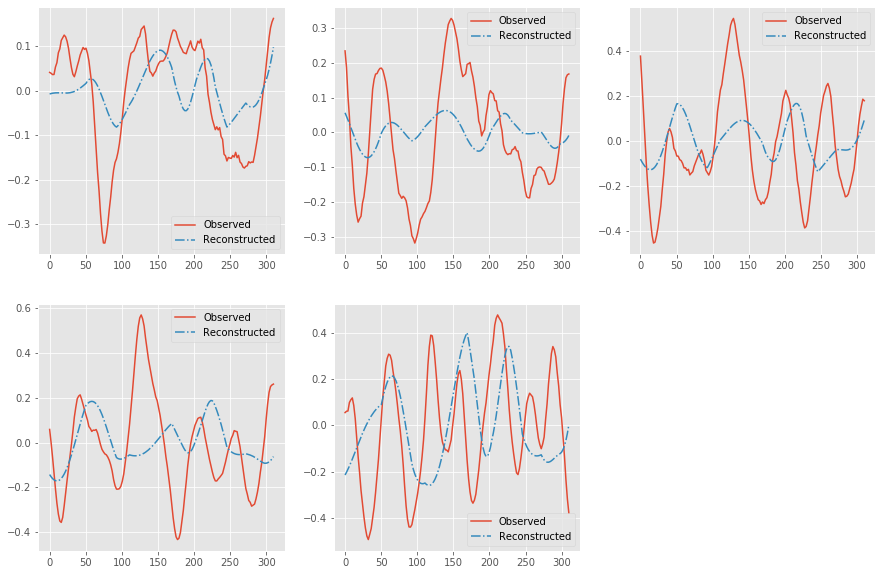

array([75, 28, 60, 13, 63])

In [57]:
res.DetectObj.PlotRecCurve()

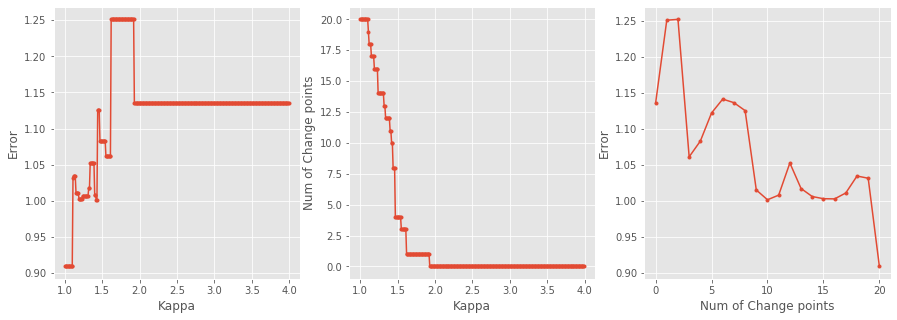

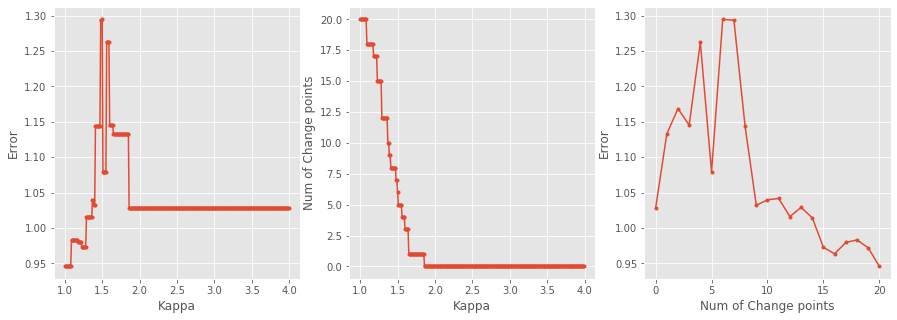

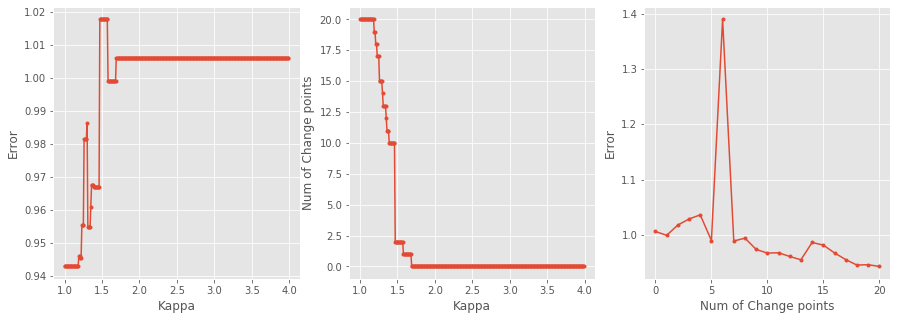

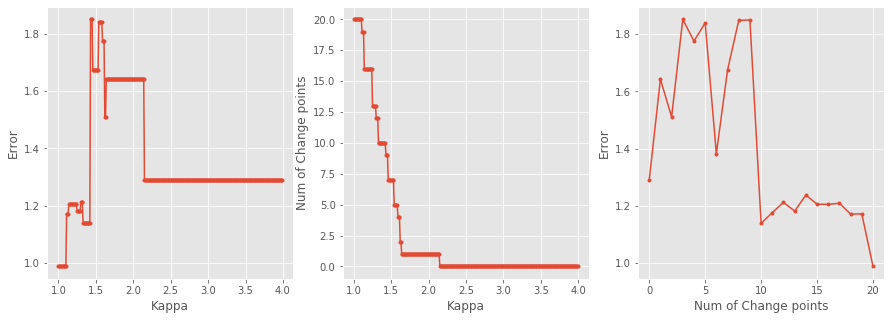

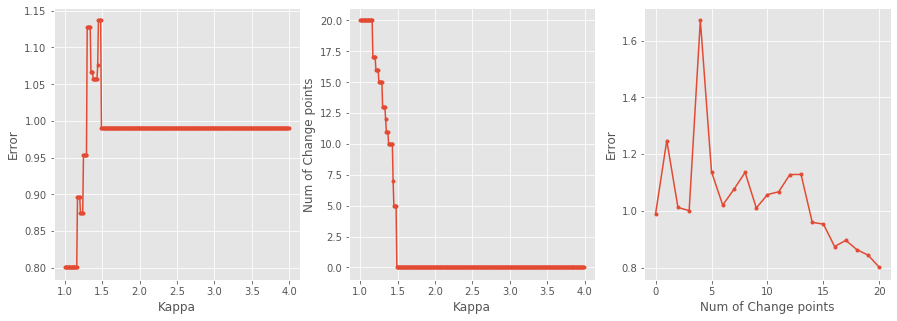

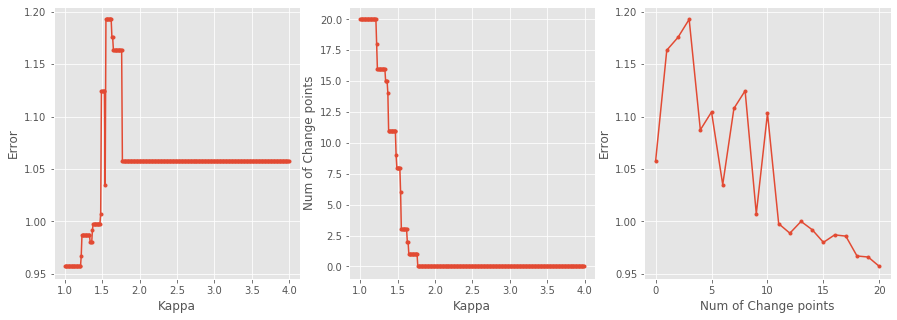

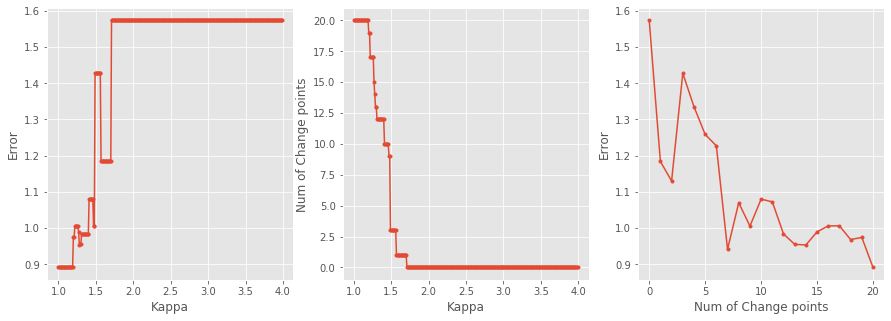

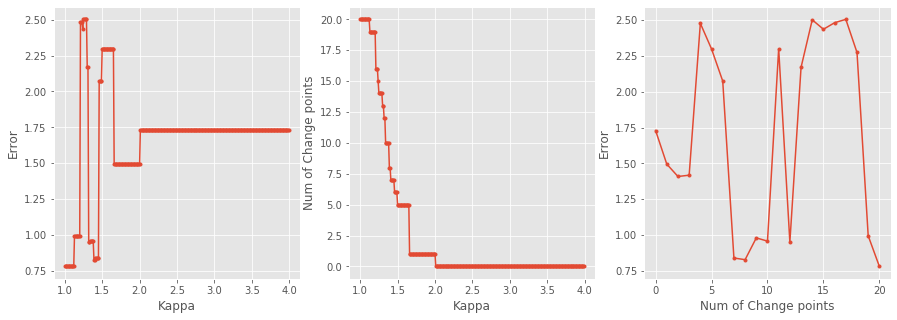

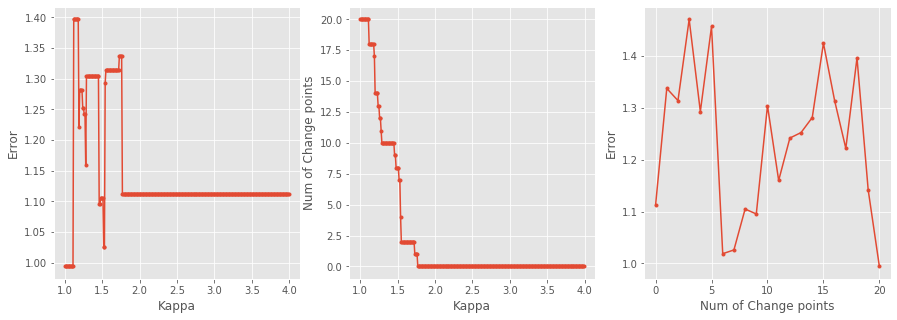

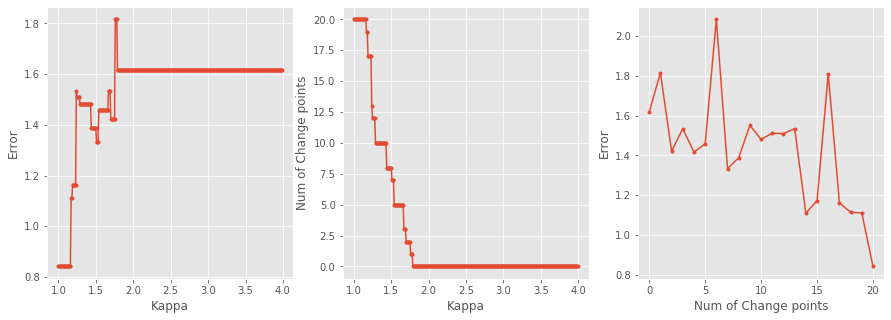

In [43]:
for fil in filsNcpts20:
    with open(fil, "rb") as f:
        res = pickle.load(f)
        res.DetectObj.PlotKappaErrCurve()

### Change the kappa range from [1, 4] to [1.2, 4]

- In this range, even under the minimal kappa (i.e. kappa=1.2), for some fMRI dataset, the TVDN method fails to yeild the maximal number of change points MaxM=20. 

- 8 of 10 datasets have reached the local minimal under this arange.

- However, when changing the range, I think we should to rerun the rank tuning algorithm for all the datasets (243 datasets), becauce the rank tuning also depends on the range of kappa


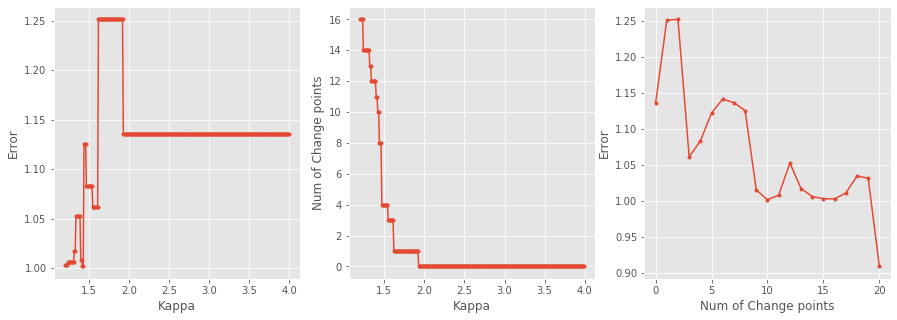

+-------------+-----------------------------------------------------+--------------------+------+
| Num of CPTs |                    Estiamted CPTs                   |        MSE         | Rank |
+-------------+-----------------------------------------------------+--------------------+------+
|      10     | [ 26.  47.  56.  85.  90. 102. 115. 123. 136. 149.] | 1.0017943610216526 |  4   |
+-------------+-----------------------------------------------------+--------------------+------+


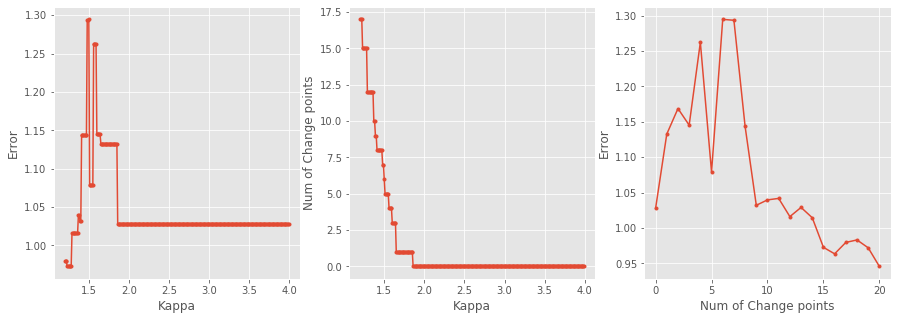

+-------------+------------------------------------------------------------------------+--------------------+------+
| Num of CPTs |                             Estiamted CPTs                             |        MSE         | Rank |
+-------------+------------------------------------------------------------------------+--------------------+------+
|      15     | [  8.  15.  22.  28.  37.  49.  57.  67.  75.  82.  95. 104. 112. 120. | 0.9725800823790822 |  4   |
|             |                                  140.]                                 |                    |      |
+-------------+------------------------------------------------------------------------+--------------------+------+


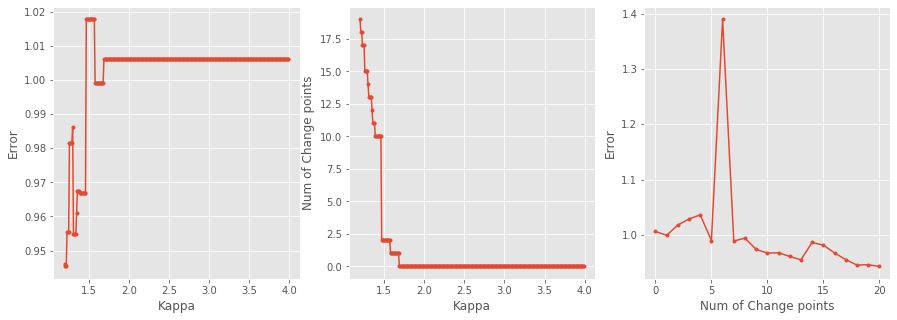

+-------------+------------------------------------------------------------------------+--------------------+------+
| Num of CPTs |                             Estiamted CPTs                             |        MSE         | Rank |
+-------------+------------------------------------------------------------------------+--------------------+------+
|      18     | [  6.  13.  24.  33.  38.  48.  58.  65.  75.  91. 102. 107. 111. 117. | 0.9453402617455893 |  4   |
|             |                          125. 131. 140. 148.]                          |                    |      |
+-------------+------------------------------------------------------------------------+--------------------+------+


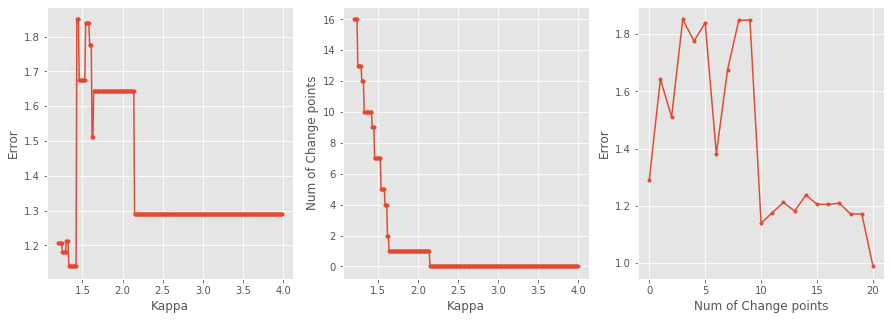

+-------------+-----------------------------------------------------+--------------------+------+
| Num of CPTs |                    Estiamted CPTs                   |        MSE         | Rank |
+-------------+-----------------------------------------------------+--------------------+------+
|      10     | [  7.  20.  27.  40.  66.  79.  92. 102. 113. 145.] | 1.1392645582323806 |  4   |
+-------------+-----------------------------------------------------+--------------------+------+


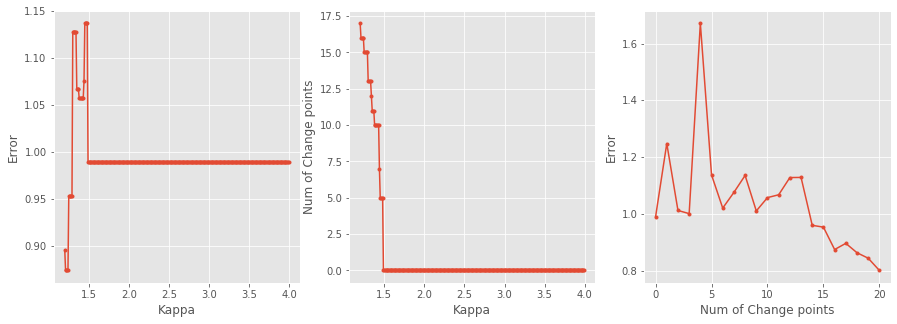

+-------------+------------------------------------------------------------------------+--------------------+------+
| Num of CPTs |                             Estiamted CPTs                             |        MSE         | Rank |
+-------------+------------------------------------------------------------------------+--------------------+------+
|      16     | [  4.  14.  19.  27.  48.  55.  62.  68.  75.  92. 101. 108. 115. 133. | 0.8740202896584695 |  4   |
|             |                               140. 146.]                               |                    |      |
+-------------+------------------------------------------------------------------------+--------------------+------+


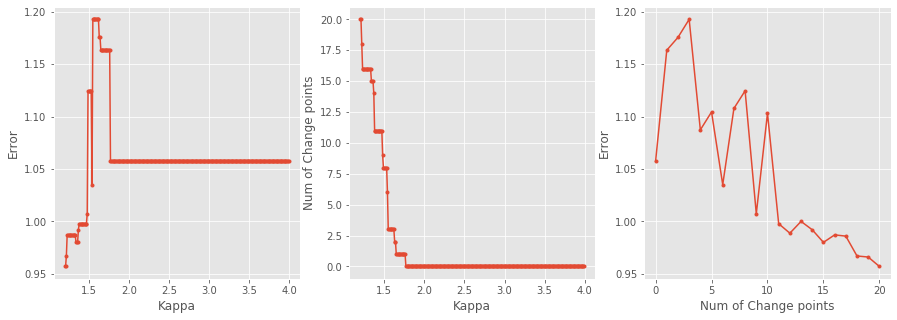

+-------------+------------------------------------------------------------------------+--------------------+------+
| Num of CPTs |                             Estiamted CPTs                             |        MSE         | Rank |
+-------------+------------------------------------------------------------------------+--------------------+------+
|      20     | [  6.  12.  18.  25.  29.  36.  42.  50.  54.  62.  74.  79.  86.  92. | 0.9570845773840183 |  4   |
|             |                     106. 114. 120. 126. 135. 149.]                     |                    |      |
+-------------+------------------------------------------------------------------------+--------------------+------+


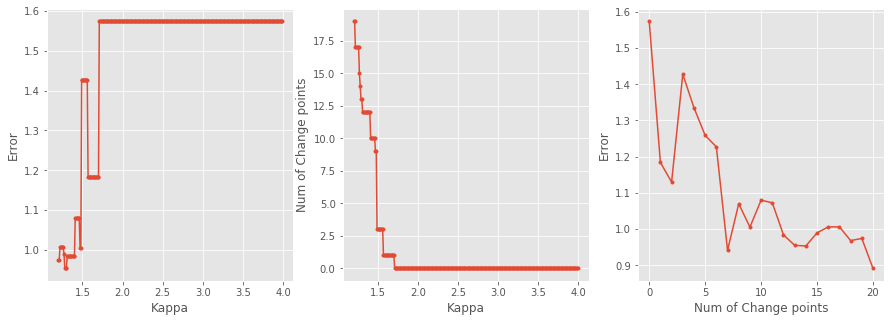

+-------------+-------------------------------------------------------------------------+-------------------+------+
| Num of CPTs |                              Estiamted CPTs                             |        MSE        | Rank |
+-------------+-------------------------------------------------------------------------+-------------------+------+
|      14     | [  8.  18.  28.  44.  55.  64.  84.  92. 100. 107. 115. 124. 136. 147.] | 0.953411089418245 |  4   |
+-------------+-------------------------------------------------------------------------+-------------------+------+


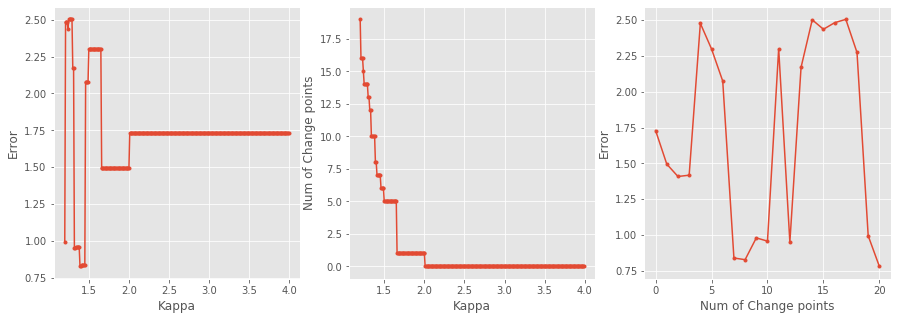

+-------------+-------------------------------------------+--------------------+------+
| Num of CPTs |               Estiamted CPTs              |        MSE         | Rank |
+-------------+-------------------------------------------+--------------------+------+
|      8      | [  6.  15.  33.  42.  53.  81. 107. 144.] | 0.8280166333437803 |  4   |
+-------------+-------------------------------------------+--------------------+------+


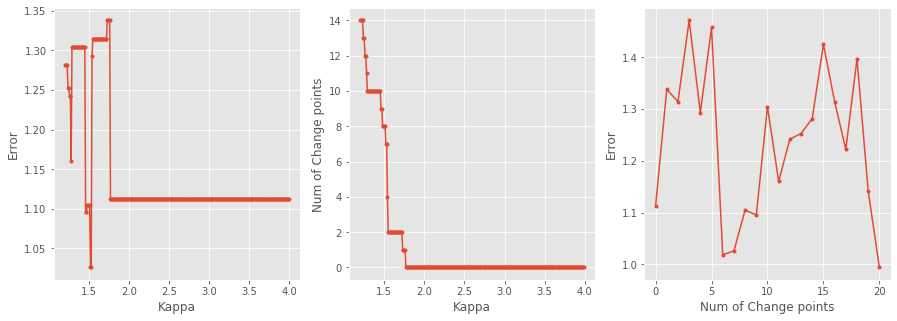

+-------------+--------------------------------------+-----------------+------+
| Num of CPTs |            Estiamted CPTs            |       MSE       | Rank |
+-------------+--------------------------------------+-----------------+------+
|      7      | [  8.  26.  51.  65.  79. 105. 132.] | 1.0260212970359 |  4   |
+-------------+--------------------------------------+-----------------+------+


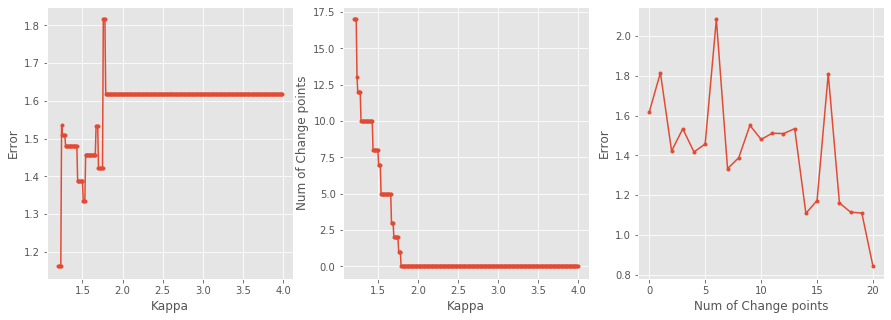

+-------------+------------------------------------------------------------------------+--------------------+------+
| Num of CPTs |                             Estiamted CPTs                             |        MSE         | Rank |
+-------------+------------------------------------------------------------------------+--------------------+------+
|      17     | [ 17.  26.  34.  49.  60.  68.  81.  90.  97. 104. 112. 118. 123. 131. | 1.1612050832855267 |  4   |
|             |                             138. 143. 150.]                            |                    |      |
+-------------+------------------------------------------------------------------------+--------------------+------+


In [44]:
kappas = np.arange(1.2, 4, 0.01)
for fil in filsNcpts20:
    with open(fil, "rb") as f:
        res = pickle.load(f)
        res.DetectObj.TuningKappa(kappas)
        res.DetectObj.UpdateEcpts()
        res.DetectObj.PlotKappaErrCurve()
        print(res.DetectObj)